## House Price Prediction

Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market.
The company uses data analytics to purchase houses at a price below their actual values and 
flip them on at a higher price. For the same purpose, the company has collected a data set 
from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.




## House Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

In [1]:
# importing the required packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading the Data
df_house=pd.read_csv('train.csv')

### Understanding the data set

In [3]:
#Displaying the sample data
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Getting the info of the dataframe
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Describing teh data set
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Summary of the data

- 81 columns
- 1460 Rows
- SalesPrice is the target column

### EDA

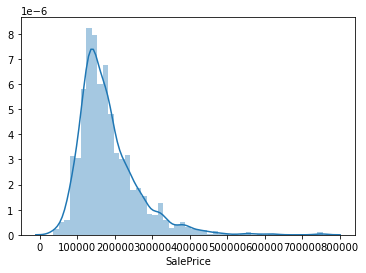

In [6]:
##Finding the distribuation of the data  
sns.distplot(df_house['SalePrice'])

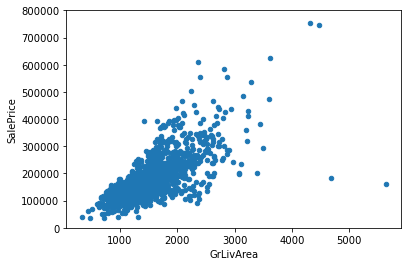

In [7]:
## Finding the corelation for the variable GrLivArea
var = 'GrLivArea'
data = pd.concat([df_house['SalePrice'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

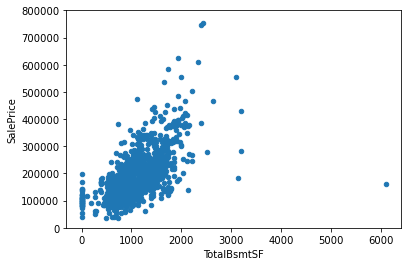

In [8]:
## Finding the corelation for the variable TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_house['SalePrice'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

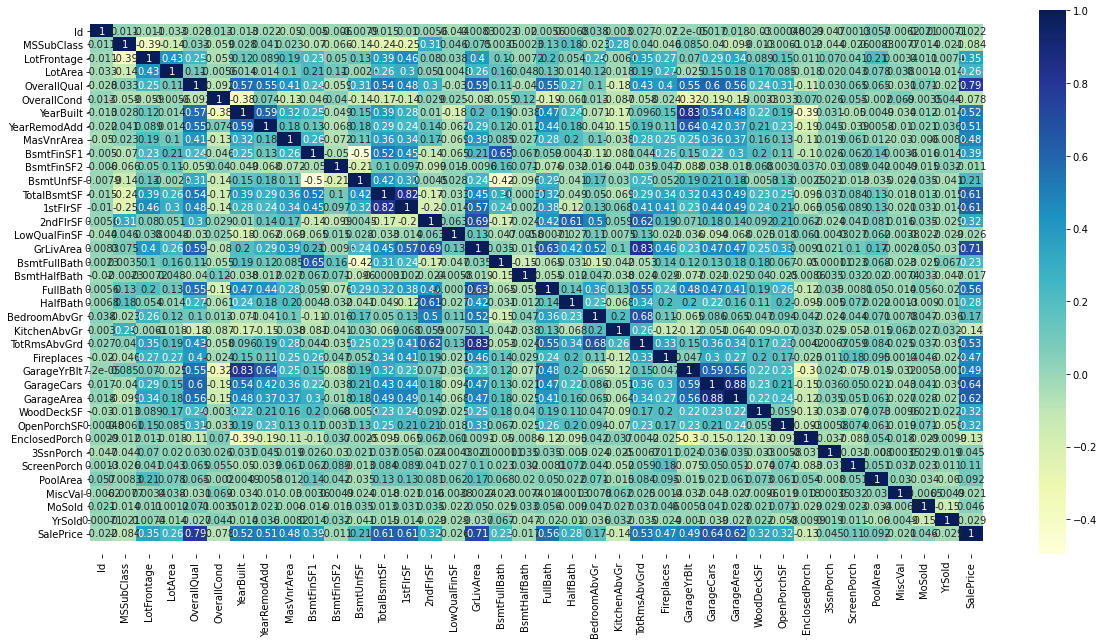

In [9]:
plt.subplots(figsize=(20,10))
ax=sns.heatmap(df_house.corr(), annot = True, cmap="YlGnBu")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+1,top-1)
plt.show()

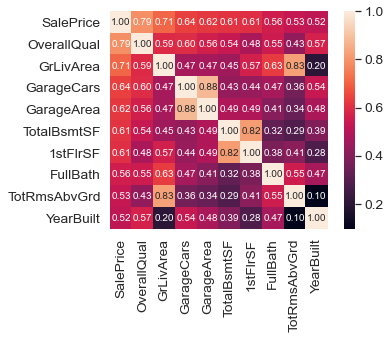

In [10]:
### Finding top 10 correlation
k = 10
cols = df_house.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Summary of EDA
   - SalePrice,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd are high positive correlated
  - KitchenAbvGr and EnclosedPorch have  negative correlation

### Missing Data

In [11]:
# Checking the percentage of missing values
round(100*(df_house.isnull().sum()/len(df_house.index)), 2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

### Summary of missing values
Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond,PoolQC, Fence, MiscFeature columns have the meaningful null values.Replacing the NAN to Null values

In [12]:
Replace_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [13]:
# Replacing the Null values
for columns in Replace_meaning:
    df_house[columns].fillna("None", inplace=True)

In [14]:
# Checking the percentage of missing values after replacing the meaning full null values
round(100*(df_house.isnull().sum()/len(df_house.index)), 2).sort_values(ascending=False).head(5)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

####  Summary
- Below columns have few null values.
- LotFrontage:- is the numeric columns and it have more null values
- GarageYrBlt:-Imputing median values
- MasVnrType :- Catagorical variable replacing None to NAN
- MasVnrArea:- Imputing median values
- Electrical:- We have minimum number of null values

In [15]:
# Dropping LotFrontage,Electrical columns 
df_house.drop("LotFrontage", axis=1, inplace=True)
df_house.drop("Electrical", axis=1, inplace=True)

In [16]:
##imputing median values to GarageYrBlt,MasVnrArea  and replacing None to MasVnrType 
df_house["GarageYrBlt"].fillna(df_house["GarageYrBlt"].median(), inplace=True)
df_house["MasVnrArea"].fillna(df_house["MasVnrArea"].median(), inplace=True)
df_house["MasVnrType"].fillna("None", inplace=True)

In [17]:
# Checking the percentage of missing values
round(100*(df_house.isnull().sum()/len(df_house.index)), 2).sort_values(ascending=False).head(20)

SalePrice       0.0
Foundation      0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
BsmtQual        0.0
YearRemodAdd    0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
RoofStyle       0.0
YearBuilt       0.0
dtype: float64

## Data Preparation

In [18]:
# Finding the object columns
series_value= df_house.columns.to_series().groupby(df_house.dtypes).groups
dic={k.name: v for k, v in series_value.items()}
column_obj=list(dic['object'])
print(column_obj)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
# Finding the Numeric columns
column_numeric=[i  for i in df_house.columns if i not in column_obj]
print(column_numeric)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


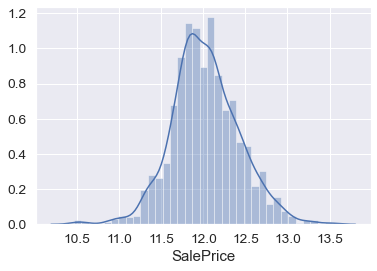

In [20]:
#Applying the log to the target columns
sns.distplot(np.log(df_house["SalePrice"]))

#####  Now the target variable is uniformally distribuated.

In [21]:
df_house["TransformedPrice"] = np.log(df_house["SalePrice"])

In [22]:
#Converting al Categorical into a number
for i in column_obj:
    feature_set = set(df_house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df_house.loc[df_house[i] == j, i] = feature_list.index(j)

In [23]:
df_house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,2,8450,0,2,0,3,1,2,...,2,3,2,0,2,2008,3,4,208500,12.247694
1,2,20,2,9600,0,2,0,3,1,4,...,2,3,2,0,5,2007,3,4,181500,12.109011
2,3,60,2,11250,0,2,2,3,1,2,...,2,3,2,0,9,2008,3,4,223500,12.317167
3,4,70,2,9550,0,2,2,3,1,1,...,2,3,2,0,2,2006,3,1,140000,11.849398
4,5,60,2,14260,0,2,2,3,1,4,...,2,3,2,0,12,2008,3,4,250000,12.429216


In [24]:
## Scaling of the variables
scaler = MinMaxScaler()
df_house[column_numeric] = scaler.fit_transform(df_house[column_numeric])

## Model Buliding

In [25]:
X = df_house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = df_house["TransformedPrice"]

In [26]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

 ## Linear Regression

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False])

In [28]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
print(col)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Utilities',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'],
      dtype='object')


In [29]:
X_train.columns[~rfe.support_]

Index(['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
pred_train_lr= lm.predict(X_train)
print(r2_score(y_train, pred_train_lr))

0.8926697903236367


## Lasso Regression

In [31]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [32]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [33]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
print(model_cv.best_estimator_)

Lasso(alpha=0.001)


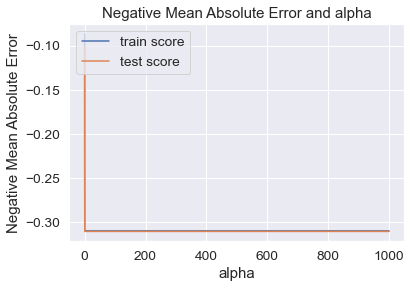

In [34]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [35]:
a=model_cv.best_params_
print(a)
alpha = a['alpha']


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print(r2_score(y_train, pred_train_lasso))

{'alpha': 0.001}
0.8808209590030665


In [36]:
#lasso.coef_
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
lassovariable = list(zip(cols, model_parameters))
lassovariable

[('MSSubClass', 10.567),
 ('MSZoning', -0.107),
 ('LotArea', 0.074),
 ('Street', 0.0),
 ('Alley', -0.0),
 ('LotShape', 0.003),
 ('LandContour', 0.014),
 ('Utilities', 0.018),
 ('LotConfig', 0.0),
 ('LandSlope', 0.003),
 ('Neighborhood', 0.01),
 ('Condition1', 0.002),
 ('Condition2', -0.01),
 ('BldgType', -0.007),
 ('HouseStyle', -0.008),
 ('OverallQual', 0.005),
 ('OverallCond', 0.739),
 ('YearBuilt', 0.169),
 ('YearRemodAdd', 0.095),
 ('RoofStyle', 0.076),
 ('RoofMatl', 0.016),
 ('Exterior1st', -0.009),
 ('Exterior2nd', 0.005),
 ('MasVnrType', -0.003),
 ('MasVnrArea', -0.005),
 ('ExterQual', 0.0),
 ('ExterCond', 0.007),
 ('Foundation', 0.003),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.009),
 ('BsmtExposure', -0.003),
 ('BsmtFinType1', -0.015),
 ('BsmtFinSF1', 0.013),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.035),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.007),
 ('1stFlrSF', -0.091),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 (

In [37]:
### Get Top 10 Variables

N = 10 
res = sorted(lassovariable, key = lambda x: x[1], reverse = True)[:N]
print("The top 10 records are : " + str(res)) 

The top 10 records are : [('MSSubClass', 10.567), ('BsmtFullBath', 0.976), ('OverallCond', 0.739), ('GarageArea', 0.28), ('YearBuilt', 0.169), ('BsmtHalfBath', 0.166), ('Functional', 0.11), ('YearRemodAdd', 0.095), ('HalfBath', 0.092), ('OpenPorchSF', 0.087)]


## Ridge Regression

In [38]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()
print(model_cv.best_estimator_)

Ridge(alpha=0.8)


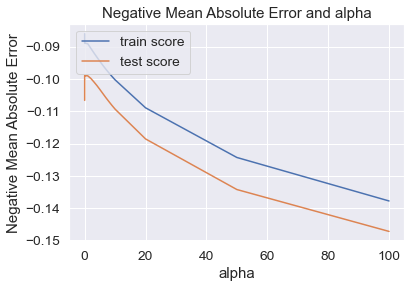

In [40]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
a=model_cv.best_params_
print(a)
alpha = a['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
pred_train_rr= ridge.predict(X_train)
print(r2_score(y_train, pred_train_rr))
ridge.coef_

{'alpha': 0.8}
0.8915324450501342


array([-1.11857642e-01,  6.99515981e-02,  3.18980514e-01, -1.27031802e-01,
        2.94638924e-03,  9.61958561e-03,  2.14454986e-02,  8.33483613e-02,
        3.51282887e-03,  4.62896197e-02,  1.73520984e-03, -9.54289444e-03,
       -1.19997015e-02, -1.92160694e-02,  4.86200002e-03,  6.50258573e-01,
        2.83317678e-01,  2.23191163e-01,  6.72945016e-02,  1.80913619e-02,
       -1.66832981e-02,  5.17307421e-03, -2.81395208e-03, -3.78791604e-03,
        1.84894467e-03,  9.52205660e-03,  6.81183608e-03,  2.74900361e-03,
        1.19892779e-02,  4.04195909e-03, -1.15504481e-02,  1.06992015e-02,
        8.15398626e-02, -8.36741415e-03,  1.20697768e-01,  8.96175923e-02,
        1.38701504e-01,  2.47654438e-03,  4.08086385e-03, -7.57482985e-02,
        3.78487229e-01,  2.31709234e-01,  6.90039680e-02,  4.08326523e-01,
        2.01219230e-01,  4.46658644e-02,  1.20932995e-01,  3.73005996e-02,
        3.66996957e-02, -1.33028692e-01,  1.44306274e-02,  1.36759878e-01,
        8.21817341e-03,  

### Summary on the Training Model
    - R2 Score
           Linear Regression:-89%
           Lasso Regression:- 88%
           Ridge Regression:- 89%

## Making Predicition

In [42]:
#Predition of the linear model
pred_test_lr= lm.predict(X_test)
print(r2_score(y_test, pred_test_lr))

0.873795414727131


In [43]:
### Lasso Regression
pred_test_lasso= lasso.predict(X_test)
print(r2_score(y_test, pred_test_lasso))

0.8730095547639912


In [44]:
## ridge Regression
pred_test_rr= ridge.predict(X_test)
print(r2_score(y_test, pred_test_rr))

0.8783724388981559


### Summary on the Test  Model
    - R2 Score
           Linear Regression:-87%
           Lasso Regression:- 87%
           Ridge Regression:- 88%

### Conclusion

 For this model lasso regreesiom is the model with alpha value 0.001 and r2 score as 88%
 
 Top Ten variables
 
The top 10 records are : [('MSSubClass', 10.567), ('BsmtFullBath', 0.976), ('OverallCond', 0.739), ('GarageArea', 0.28), ('YearBuilt', 0.169), ('BsmtHalfBath', 0.166), ('Functional', 0.11), ('YearRemodAdd', 0.095), ('HalfBath', 0.092), ('OpenPorchSF', 0.087)]

### Questions

In [54]:
alpha = 0.001*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print(r2_score(y_train, pred_train_lasso))

0.8634288427642939


In [46]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
lassov = list(zip(cols, model_parameters))
lassov

N = 10 
res = sorted(lassov, key = lambda x: x[1], reverse = True)[:N]
print("The top 10 records are : " + str(res))

The top 10 records are : [('MSSubClass', 10.296), ('BsmtFullBath', 1.102), ('OverallCond', 0.705), ('Street', 0.347), ('GarageArea', 0.285), ('YearBuilt', 0.282), ('YearRemodAdd', 0.212), ('BsmtHalfBath', 0.199), ('OpenPorchSF', 0.105), ('HalfBath', 0.091)]


In [47]:
pred_test_lasso= lasso.predict(X_test)
print(r2_score(y_test, pred_test_lasso))

0.8786933415721098


In [55]:
alpha = 0.16
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
pred_train_rr= ridge.predict(X_train)
print(r2_score(y_train, pred_train_rr))
ridge.coef_

0.88102364316856


array([ 8.18691872e-02,  4.15927157e-01,  2.06649403e-02,  1.28038033e-02,
        2.74594874e-02,  1.20829815e-01,  5.71533759e-04,  4.73461117e-02,
        2.29606574e-03, -9.19195192e-03, -1.54943556e-02,  1.79458378e-03,
        5.40137220e-03,  7.35321900e-01,  1.21740275e-01,  1.68946599e-02,
       -2.06404016e-02,  5.03247313e-03, -3.12450201e-03, -2.94529299e-03,
       -3.24404680e-02,  8.65476449e-03, -2.58673469e-06, -2.54458921e-04,
        1.03019938e-02,  2.68778372e-04, -1.05375254e-02,  1.40483990e-02,
        1.80180345e-01, -5.53881881e-03,  1.12749587e-01,  2.63188967e-02,
        2.03700769e-01,  5.05319936e-03,  7.14126023e-03, -1.13910317e-01,
        4.68065216e-01,  1.79078705e-01,  4.24086367e-02,  4.58531175e-01,
        7.85454884e-03,  8.01478018e-02,  2.97457996e-02,  1.04642325e-01,
       -1.82697251e-01,  1.84761119e-02,  8.90572091e-02,  1.51612845e-02,
        6.90347475e-02, -4.78524973e-03, -1.31952822e-02, -5.30691837e-02,
        3.17538248e-03,  

In [56]:
pred_test_rr= ridge.predict(X_test)
print(r2_score(y_test, pred_test_rr))

0.8646315254649808


In [57]:
print("ridge_train :",(r2_score(y_train, pred_train_rr)))
print("ridge_test  :",(r2_score(y_test, pred_test_rr)))

## Lasso Regression -- Train & Test
print("lasso_train :",(r2_score(y_train, pred_train_lasso)))
print("lasso_test  :",(r2_score(y_test, pred_test_lasso)))

ridge_train : 0.88102364316856
ridge_test  : 0.8646315254649808
lasso_train : 0.8634288427642939
lasso_test  : 0.8786933415721098


In [58]:
## Split X Train and Y Train data's
QX =df_house.drop(["Id", "SalePrice", "TransformedPrice","MSSubClass","BsmtFullBath","OverallCond","YearBuilt","GarageArea"], axis=1)
Qy = df_house["TransformedPrice"]


# split into train and test
X_train, X_test, y_train, y_test = train_test_split(QX, Qy, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [59]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8700367931132772
0.8643662774105869


In [60]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
lassov = list(zip(cols, model_parameters))
lassov

N = 5
res = sorted(lassov, key = lambda x: x[1], reverse = True)[:N]
print("The top  5 records are : " + str(res))

The top  5 records are : [('MSZoning', 10.712), ('GrLivArea', 0.829), ('OverallQual', 0.738), ('GarageCars', 0.264), ('TotRmsAbvGrd', 0.138)]
